In [1]:
import functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/original_data.csv")

In [3]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0, stratify=df['genre'])
df_train

,id,movie_name,synopsis,genre
39841,8315,Tommy Atkins,A cleric enlists on learning he loves his brot...,action
22314,4958,Hostage,"When a family is held hostage, former hostage ...",action
33001,21828,Eternity Island,Details kept under wrap.,crime
6291,66791,69 Reality in Us,"A Twisted triangle love, where a man feels the...",romance
1256,26554,"Goodnight, Sweetheart",A journalist attacks the campaign of a mayoral...,crime
...,...,...,...,...
7115,11151,Mr. Moon,"Mr. Dennis Hope, the man who actually owns the...",adventure
49426,65700,Ben & Arthur,A pair of recently married gay men are threate...,romance
50639,49827,Death Club,"After five friends break into a shut down, aba...",horror
45494,85181,O Homem dos Olhos Tortos,A gang of criminals is persecuted by two detec...,thriller


In [4]:
#all the preprocessing for the training
df_train, x_train = functions.preprocessing(df=df_train, remove_useless_sentences = True, is_train = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)
y_train = functions.target_variable(df_train, 'genre')
print(y_train)
print(x_train[1])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[0 0 2 ... 5 9 1]
['family', 'held', 'hostage', 'hostage', 'negotiator', 'jeff', 'talley', 'arrives', 'scene', 'talley', 'family', 'kidnapped', 'talley', 'decide', 'important', 'saving', 'family', 'doesn', 'know', 'saving', 'family']


In [5]:
#all the possible preprocessing for the training
df_test, x_test = functions.preprocessing(df=df_test, remove_useless_sentences = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)
y_test = functions.target_variable(df_test, 'genre')
x_test[1]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['tara',
 'love',
 'krishna',
 'college',
 'friend',
 'doe',
 'reciprocate',
 'feeling',
 'thing',
 'turn',
 'krishna',
 'fall',
 'love',
 'lizy']

In [6]:
#prints for the choice of the padding size
list_lengths = [len(sublist) for sublist in x_train]

#average length
average_length = sum(list_lengths) / len(list_lengths)

print("Average Length of Lists in x_train:", average_length)

#maximum length
max_length = max(list_lengths)

print("Maximum Length of Lists in x_train:", max_length)

#longer than 30
count_longer_than_30 = sum(1 for sublist in x_train if len(sublist) > 30)

print("Number of lists longer than 30 in x_train:", count_longer_than_30)

Average Length of Lists in x_train: 14.168780101910235
Maximum Length of Lists in x_train: 43
Number of lists longer than 30 in x_train: 58


In [7]:
#function called with only the training
padded_train, tokenizer = functions.tokenizer_padding(x_train, max_length=30)
print(padded_train, len(tokenizer.word_index)) #len(tokenizer.word_index) is the vocab_size


[[8638 1272 1054 ...    0    0    0]
 [   9  663  534 ...    0    0    0]
 [2258 1321 1919 ...    0    0    0]
 ...
 [  10  199 3389 ...    0    0    0]
 [  66   80 7522 ...    0    0    0]
 [3508  708 2598 ...    0    0    0]] 37201


In [8]:
#function called with training and test
padded_train, padded_test, tokenizer = functions.tokenizer_padding(x_train=x_train, max_length=30, x_test=x_test)
print(padded_train, "\n\n", padded_test, len(tokenizer.word_index))

[[8638 1272 1054 ...    0    0    0]
 [   9  663  534 ...    0    0    0]
 [2258 1321 1919 ...    0    0    0]
 ...
 [  10  199 3389 ...    0    0    0]
 [  66   80 7522 ...    0    0    0]
 [3508  708 2598 ...    0    0    0]] 

 [[   41    85    56 ...     0     0     0]
 [ 8548     7  3289 ...     0     0     0]
 [12814    13  6420 ...     0     0     0]
 ...
 [ 2991    50   254 ...     0     0     0]
 [ 5298  3076  1768 ...     0     0     0]
 [    8   910   325 ...     0     0     0]] 37201


In [9]:
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print(padded_train.shape)
print(padded_test.shape)

y_train: (42979,)
y_test: (10800,)
(42979, 30)
(10800, 30)


## Models

Increasing the vector_size, results seems to slightly improve.ì, while with low values such as 30 results are worse.

In [10]:
from gensim.models import Word2Vec
word_2_vec_learner = Word2Vec(sentences = x_train, vector_size = 100, window = 5, min_count = 1, workers = 4, sg =1)

In [11]:
#words close to crime
criminal = word_2_vec_learner.wv.most_similar("criminal")
criminal

[('yakuza', 0.7925553917884827),
 ('mobster', 0.7888856530189514),
 ('prostitution', 0.7884525060653687),
 ('gangster', 0.7878466248512268),
 ('smuggler', 0.785232663154602),
 ('goon', 0.7847535014152527),
 ('narcotic', 0.7838371992111206),
 ('hitman', 0.7805490493774414),
 ('heroin', 0.7800117135047913),
 ('mob', 0.7790011763572693)]

In [12]:
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))  # 100 is the vector_size in Word2Vec

for word, i in word_index.items():
    if word in word_2_vec_learner.wv:
        embedding_matrix[i] = word_2_vec_learner.wv[word]

In [13]:
len(word_index)

37201

In [14]:
embedding_matrix.shape

(37202, 100)

## CNN

In [15]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout
from keras.regularizers import l2, l1
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

In [16]:
import random
import itertools

In [23]:
# set parameters:
# embedding_dims = 32 # Length of the token vectors
filters = 64 # dimensionality of the output space
hyperparameters = {
    'learning_rate': [0.005, 0.001],
    'batch_size' : [32],
    'dropout' : [0.3, 0.4, 0.5],
    'recurrent_dropout' : [0.5],
    'kr' : [0.01, 0.005, 0.001],  # Kernel regularizer
    'kernel_size' : [3, 5],  # height and width of the convolution window
    'filters' : [64, 32],
    'layer_size' : [32, 64, 128]   # hidden layers
}

number_of_combinations = 10    # IMPORTANT

random_combinations = random.sample(list(itertools.product(*hyperparameters.values())), number_of_combinations) 


def build_model_cnn_w2v(param_dict):
    #embedding and CNN
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100,  #100 is the vector_size
                        weights=[embedding_matrix],  #set pre-trained weights
                        input_length=padded_train.shape[1], trainable=False))

    model.add(Dropout(0.3))
    # We add a Convolution1D, which will learn word group filters of size filter_length:
    # This layer creates a convolution kernel that is convolved with the layer input
    # over a single spatial (or temporal) dimension to produce a tensor of outputs
    model.add(Conv1D(param_dict['filters'],
                    param_dict['kernel_size'],
                    padding='valid',
                    activation='relu',
                    strides=1))
    # We use max pooling:
    model.add(GlobalMaxPooling1D())
    # We add a vanilla hidden layer:
    model.add(Dense(param_dict['layer_size']*2, activation='relu', kernel_regularizer=l2(param_dict['kr'])))
    model.add(Dropout(param_dict['dropout']))
    # We add the second vanilla hidden layer:
    model.add(Dense(param_dict['layer_size'], activation='relu', kernel_regularizer=l2(param_dict['kr'])))
    model.add(Dropout(param_dict['dropout']))
    model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    optimizer = Adam(learning_rate=param_dict['learning_rate'])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [17]:
# Plot training and validation accuracy
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Random search

Testing with hyperparameters: {'embedding_dim': 60, 'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.3, 'recurrent_dropout': 0.5, 'kr': 0.005, 'kernel_size': 3, 'filters': 32, 'layer_size': 128}
Result combo 0: 0.35018330812454224


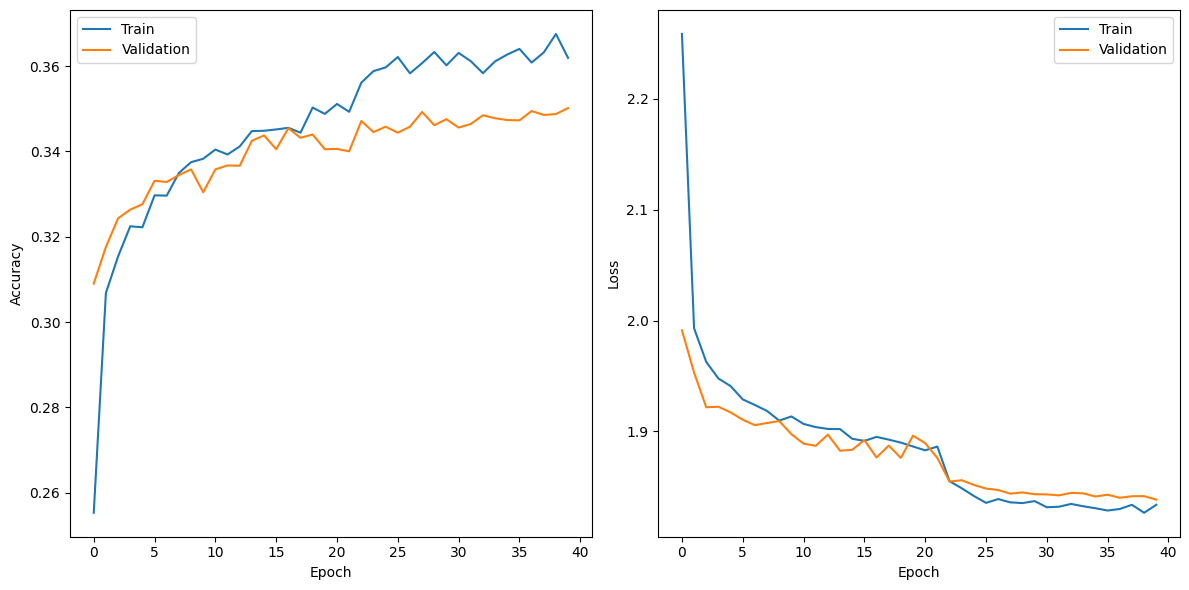

Testing with hyperparameters: {'embedding_dim': 50, 'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.4, 'recurrent_dropout': 0.5, 'kr': 0.01, 'kernel_size': 3, 'filters': 32, 'layer_size': 64}
Result combo 1: 0.34017202258110046


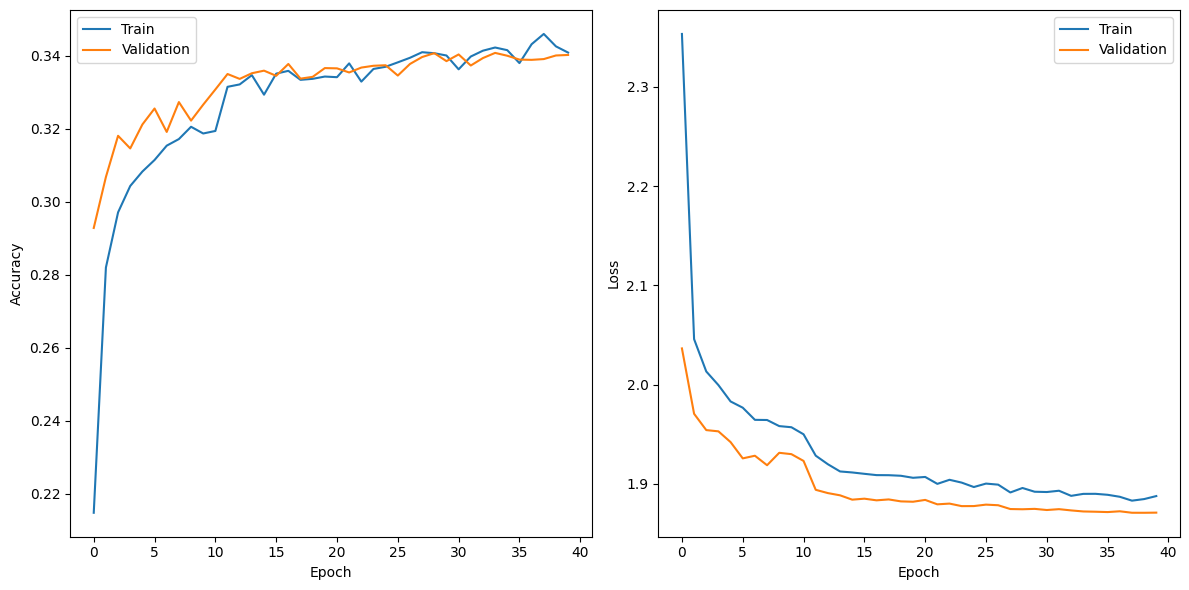

Testing with hyperparameters: {'embedding_dim': 40, 'learning_rate': 0.005, 'batch_size': 32, 'dropout': 0.5, 'recurrent_dropout': 0.5, 'kr': 0.005, 'kernel_size': 5, 'filters': 64, 'layer_size': 128}
Result combo 2: 0.32557812333106995


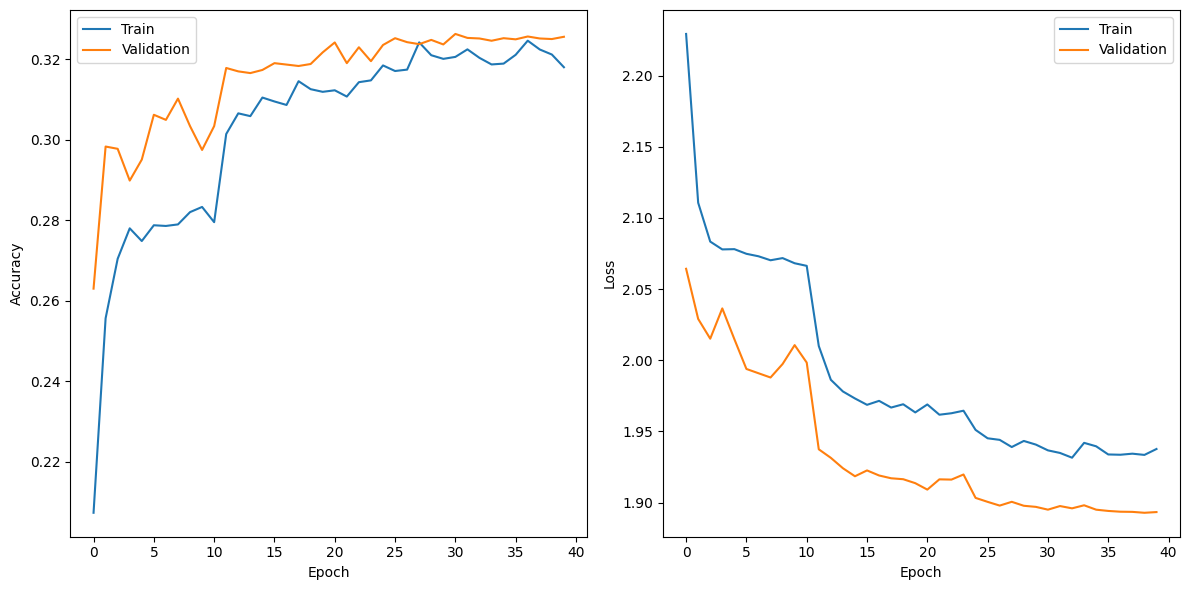

Testing with hyperparameters: {'embedding_dim': 40, 'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.4, 'recurrent_dropout': 0.5, 'kr': 0.005, 'kernel_size': 3, 'filters': 32, 'layer_size': 64}
Result combo 3: 0.3429920971393585


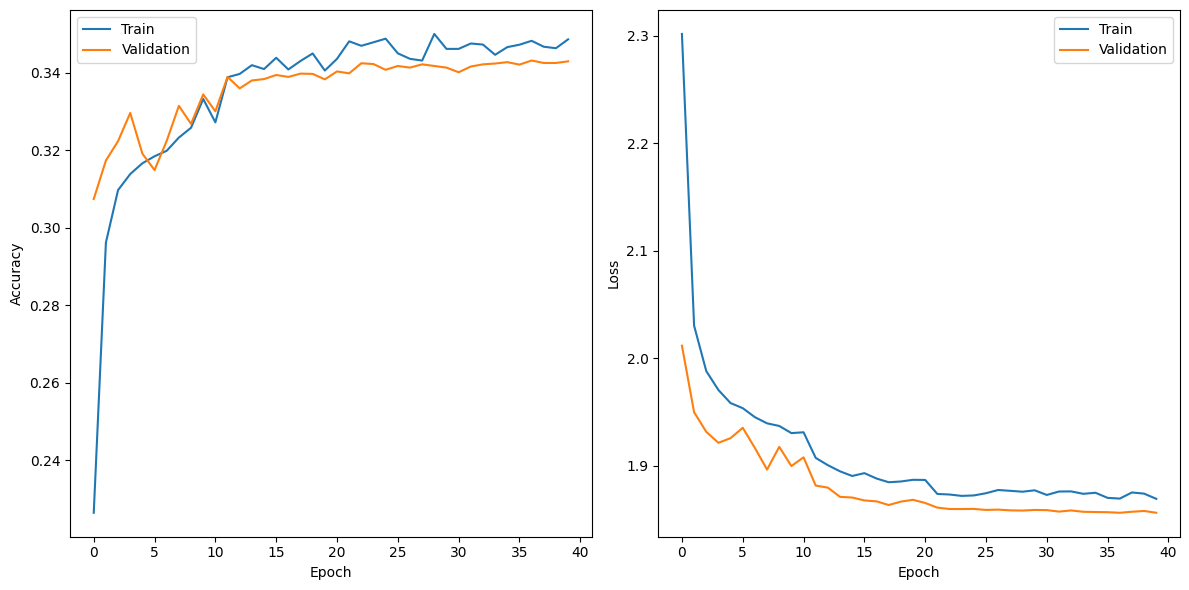

Testing with hyperparameters: {'embedding_dim': 40, 'learning_rate': 0.005, 'batch_size': 32, 'dropout': 0.4, 'recurrent_dropout': 0.5, 'kr': 0.01, 'kernel_size': 3, 'filters': 64, 'layer_size': 32}
Result combo 4: 0.32000845670700073


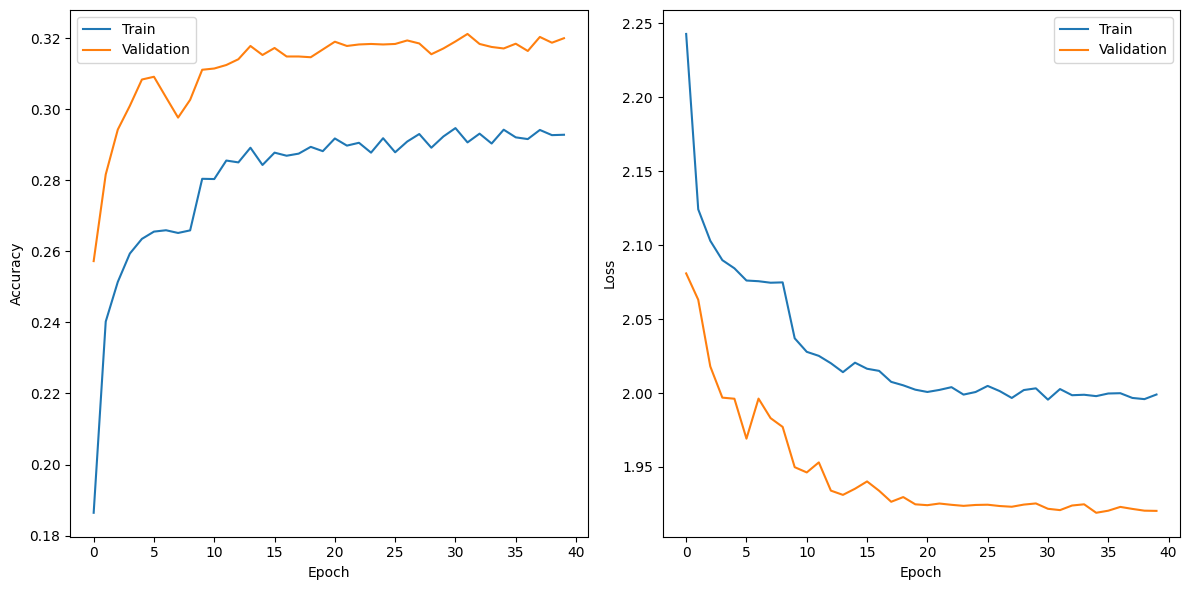

Testing with hyperparameters: {'embedding_dim': 40, 'learning_rate': 0.005, 'batch_size': 32, 'dropout': 0.4, 'recurrent_dropout': 0.5, 'kr': 0.005, 'kernel_size': 5, 'filters': 32, 'layer_size': 128}
Result combo 5: 0.3249436020851135


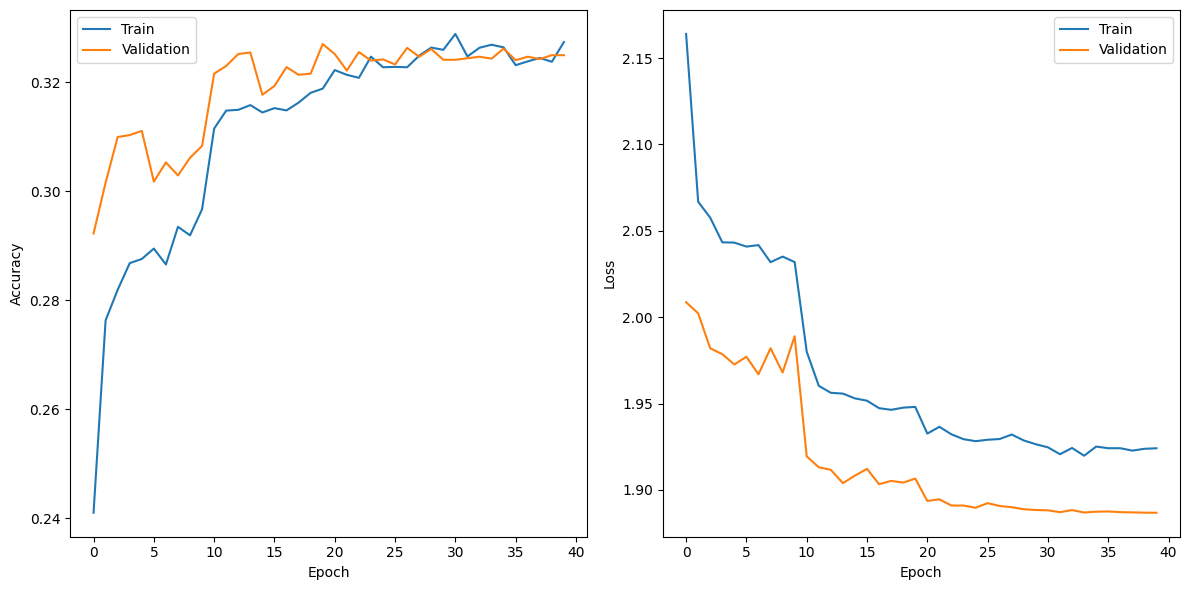

Testing with hyperparameters: {'embedding_dim': 50, 'learning_rate': 0.005, 'batch_size': 32, 'dropout': 0.3, 'recurrent_dropout': 0.5, 'kr': 0.005, 'kernel_size': 5, 'filters': 32, 'layer_size': 128}
Result combo 6: 0.32811617851257324


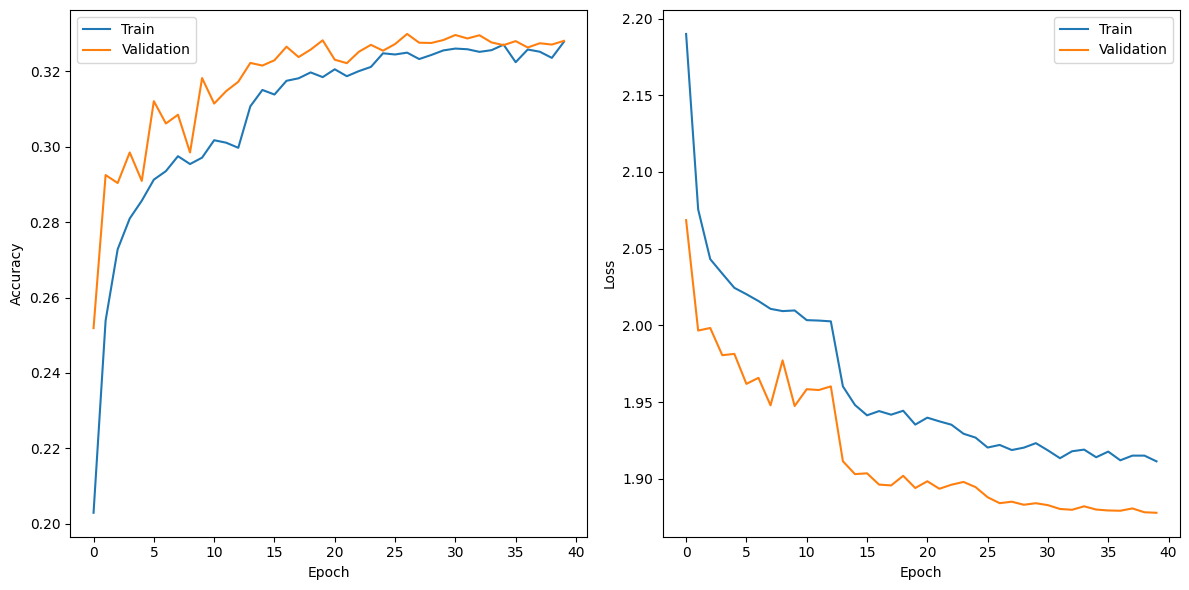

Testing with hyperparameters: {'embedding_dim': 60, 'learning_rate': 0.005, 'batch_size': 32, 'dropout': 0.5, 'recurrent_dropout': 0.5, 'kr': 0.005, 'kernel_size': 3, 'filters': 64, 'layer_size': 32}
Result combo 7: 0.3005499243736267


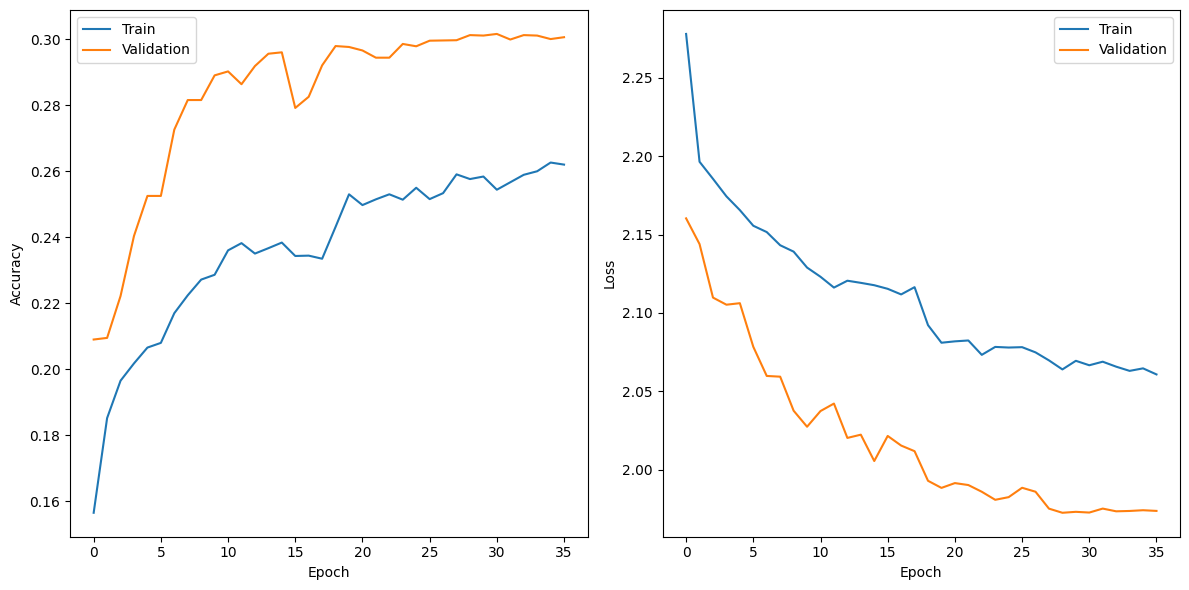

Testing with hyperparameters: {'embedding_dim': 40, 'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.5, 'recurrent_dropout': 0.5, 'kr': 0.001, 'kernel_size': 3, 'filters': 32, 'layer_size': 64}
Result combo 8: 0.3456711769104004


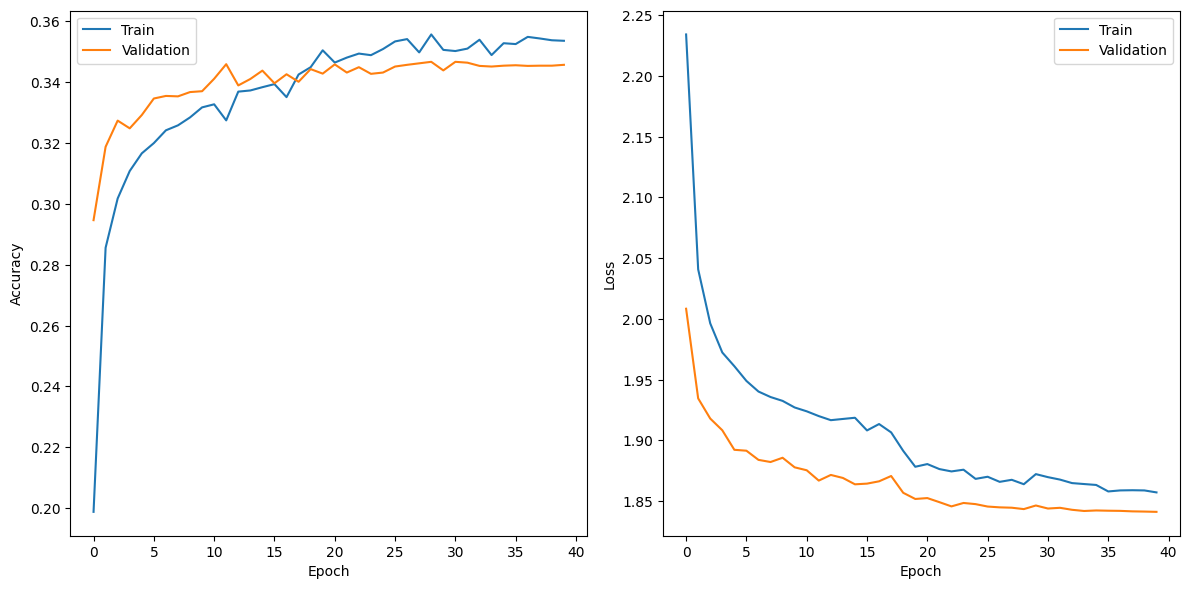

Testing with hyperparameters: {'embedding_dim': 40, 'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.3, 'recurrent_dropout': 0.5, 'kr': 0.01, 'kernel_size': 5, 'filters': 64, 'layer_size': 64}
Result combo 9: 0.34503665566444397


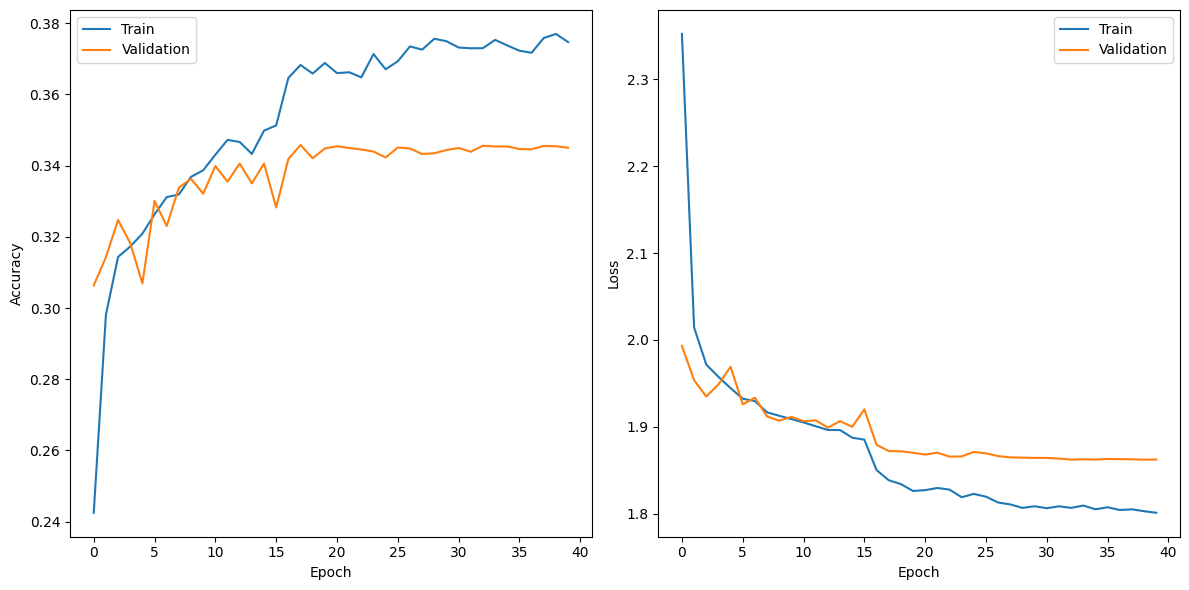

In [25]:
best_params = None
best_model = None
best_history = None
best_accuracy = 0.0
all_results = {}

number_of_epochs = 40

for idx, combo in enumerate(random_combinations):
    param_dict = dict(zip(hyperparameters.keys(), combo))
    print("Testing with hyperparameters:", param_dict)

    model_cnn_w2v = build_model_cnn_w2v(param_dict)

    #eraly stopping and decreasing lr
    early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=3, min_lr=0.000001)

    history = model_cnn_w2v.fit(padded_train, y_train, validation_split=0.33, epochs=number_of_epochs, batch_size=param_dict['batch_size'], verbose=0, callbacks=[early_stopping, reduce_lr], workers = 6)

    print('Result combo {}:'.format(idx), history.history['val_accuracy'][-1])
    # Record the results
    accuracy = max(history.history['val_accuracy'])
    all_results[str(param_dict)] = accuracy

    # Update best parameters if the current combination is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = param_dict
        best_history = history
        best_model = model_cnn_w2v
    
    plot_history(history)

## Comparisons

In [26]:
print('Best model is:', best_params, '\nValidation accuracy:', best_accuracy)

Best model is: {'embedding_dim': 60, 'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.3, 'recurrent_dropout': 0.5, 'kr': 0.005, 'kernel_size': 3, 'filters': 32, 'layer_size': 128} 
Validation accuracy: 0.35018330812454224


In [27]:
test_loss_w2v, test_acc_w2v = best_model.evaluate(padded_test, y_test)
print('Test Loss %f, Test Accuracy %f' % (test_loss_w2v, test_acc_w2v))

338/338 [==============================] - 1s 3ms/step - loss: 1.8381 - accuracy: 0.3559
Test Loss 1.838132, Test Accuracy 0.355926


### How does the best model work?

In [62]:
# set parameters:
# embedding_dims = 32 # Length of the token vectors
filters = 64 # dimensionality of the output space
hyperparameters = {
    'learning_rate': [0.001],
    'batch_size' : [32],
    'dropout' : [0.3],
    'recurrent_dropout' : [0.5],
    'kr' : [0.005],  # Kernel regularizer
    'kernel_size' : [3],  # height and width of the convolution window
    'filters' : [32],
    'layer_size' : [128]   # hidden layers
}

number_of_combinations = 1   # IMPORTANT

random_combinations = random.sample(list(itertools.product(*hyperparameters.values())), number_of_combinations) 


def best_model_tests(param_dict):
    #embedding and CNN
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100,  #100 is the vector_size
                        weights=[embedding_matrix],  #set pre-trained weights
                        input_length=padded_train.shape[1], trainable=False))

    model.add(Dropout(0.3))
    # We add a Convolution1D, which will learn word group filters of size filter_length:
    # This layer creates a convolution kernel that is convolved with the layer input
    # over a single spatial (or temporal) dimension to produce a tensor of outputs
    model.add(Conv1D(param_dict['filters'],
                    param_dict['kernel_size'],
                    padding='valid',
                    activation='relu',
                    strides=1))
    # We use max pooling:
    model.add(GlobalMaxPooling1D())
    # We add a vanilla hidden layer:
    model.add(Dense(param_dict['layer_size']*2, activation='relu', kernel_regularizer=l2(param_dict['kr'])))
    model.add(Dropout(param_dict['dropout']))
    # We add the second vanilla hidden layer:
    model.add(Dense(param_dict['layer_size'], activation='relu', kernel_regularizer=l2(param_dict['kr'])))
    model.add(Dropout(param_dict['dropout']))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    optimizer = Adam(learning_rate=param_dict['learning_rate'])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

Testing with hyperparameters: {'learning_rate': 0.001, 'batch_size': 32, 'dropout': 0.3, 'recurrent_dropout': 0.5, 'kr': 0.005, 'kernel_size': 3, 'filters': 32, 'layer_size': 128}
Epoch 1/40
900/900 [==============================] - 9s 8ms/step - loss: 2.2608 - accuracy: 0.2451 - val_loss: 1.9893 - val_accuracy: 0.3132 - lr: 0.0010
Epoch 2/40
900/900 [==============================] - 6s 7ms/step - loss: 1.9980 - accuracy: 0.3037 - val_loss: 1.9574 - val_accuracy: 0.3106 - lr: 0.0010
Epoch 3/40
900/900 [==============================] - 7s 8ms/step - loss: 1.9665 - accuracy: 0.3144 - val_loss: 1.9403 - val_accuracy: 0.3237 - lr: 0.0010
Epoch 4/40
900/900 [==============================] - 7s 8ms/step - loss: 1.9495 - accuracy: 0.3217 - val_loss: 1.9143 - val_accuracy: 0.3273 - lr: 0.0010
Epoch 5/40
900/900 [==============================] - 7s 8ms/step - loss: 1.9375 - accuracy: 0.3250 - val_loss: 1.9439 - val_accuracy: 0.3206 - lr: 0.0010
Epoch 6/40
900/900 [=========================

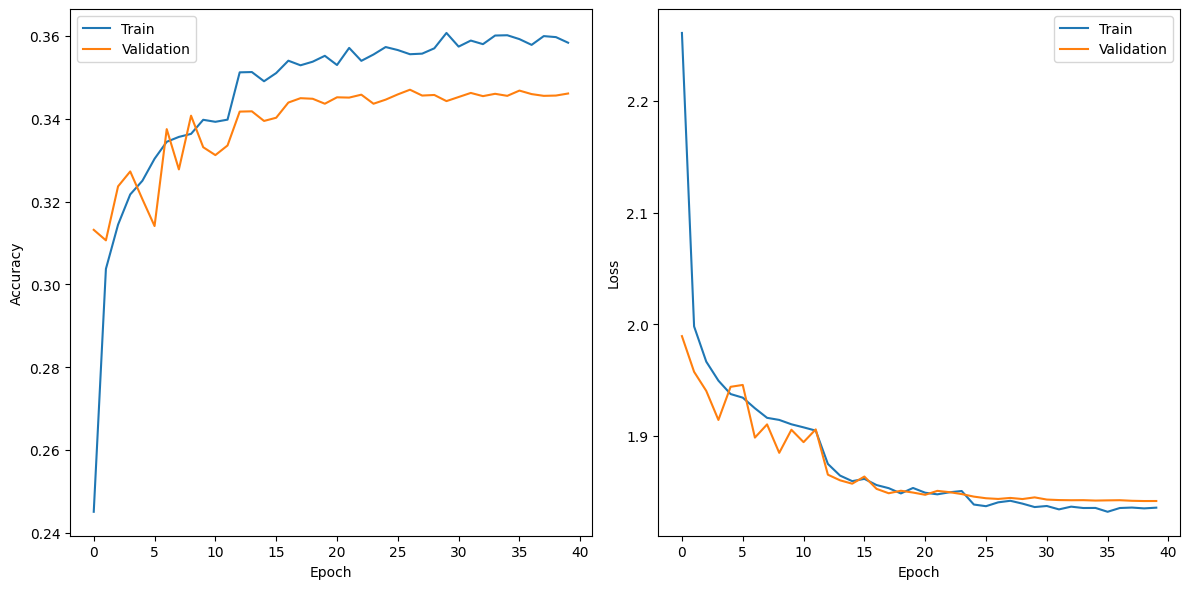

In [63]:
best_params = None
best_model = None
best_history = None
best_accuracy = 0.0
all_results = {}

number_of_epochs = 40

for idx, combo in enumerate(random_combinations):
    param_dict = dict(zip(hyperparameters.keys(), combo))
    print("Testing with hyperparameters:", param_dict)

    model_cnn_w2v = best_model_tests(param_dict)

    #eraly stopping and decreasing lr
    early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=3, min_lr=0.000001)

    history = model_cnn_w2v.fit(padded_train, y_train, validation_split=0.33, epochs=number_of_epochs, batch_size=param_dict['batch_size'], verbose=1, callbacks=[early_stopping, reduce_lr], workers = 6)

    print('Result combo {}:'.format(idx), history.history['val_accuracy'][-1])
    # Record the results
    accuracy = max(history.history['val_accuracy'])
    all_results[str(param_dict)] = accuracy

    # Update best parameters if the current combination is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = param_dict
        best_history = history
        best_model = model_cnn_w2v
    
    plot_history(history)

In [72]:
test_loss_w2v, test_acc_w2v = model_cnn_w2v.evaluate(padded_test, y_test)
print('Test Loss %f, Test Accuracy %f' % (test_loss_w2v, test_acc_w2v))

338/338 [==============================] - 1s 3ms/step - loss: 1.8449 - accuracy: 0.3506
Test Loss 1.844901, Test Accuracy 0.350648


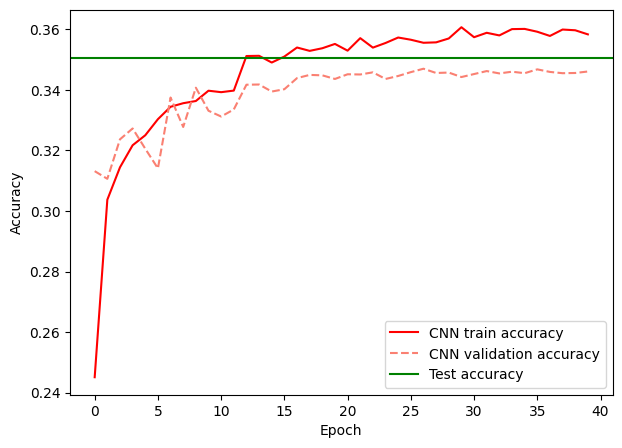

In [75]:
plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'], label='CNN train accuracy',c='red')
plt.plot(history.history['val_accuracy'], label='CNN validation accuracy', linestyle='--', c='salmon')
plt.axhline(0.350648, c='green', label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [76]:
#insert the best model
predictions = model_cnn_w2v.predict(padded_test)

338/338 [==============================] - 1s 3ms/step


In [77]:
from sklearn.metrics import classification_report
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.28      0.23      0.25      1080
           1       0.30      0.16      0.21      1080
           2       0.33      0.48      0.39      1080
           3       0.37      0.42      0.39      1080
           4       0.33      0.24      0.28      1080
           5       0.38      0.51      0.43      1080
           6       0.31      0.28      0.29      1080
           7       0.42      0.58      0.49      1080
           8       0.38      0.57      0.46      1080
           9       0.22      0.04      0.07      1080

    accuracy                           0.35     10800
   macro avg       0.33      0.35      0.33     10800
weighted avg       0.33      0.35      0.33     10800



In [78]:
genres = np.unique(df['genre'])

genre_mapping = {}
for i, genre in enumerate(genres):
    genre_mapping[i] = genre

genre_mapping

{0: 'action',
 1: 'adventure',
 2: 'crime',
 3: 'family',
 4: 'fantasy',
 5: 'horror',
 6: 'mystery',
 7: 'romance',
 8: 'scifi',
 9: 'thriller'}

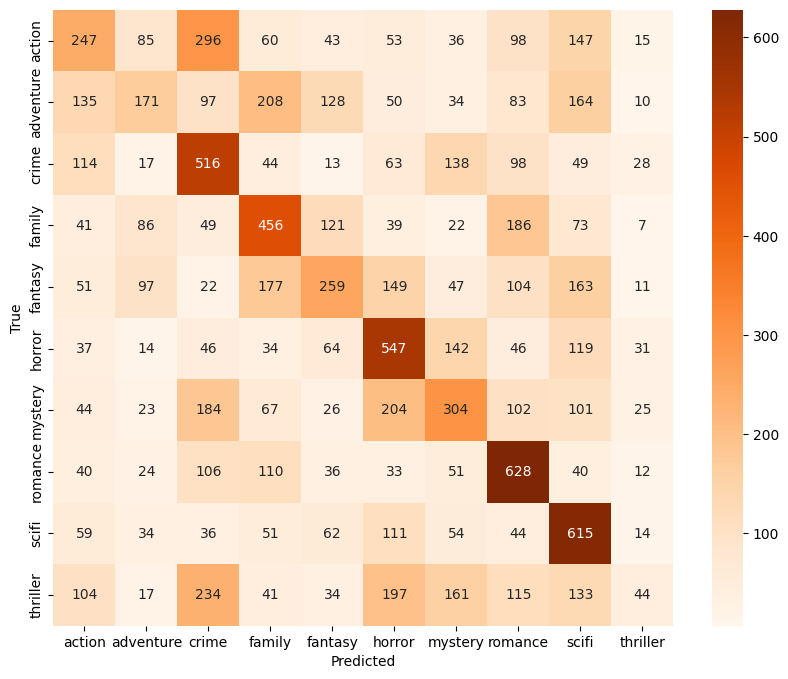

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf = confusion_matrix(y_true=y_test,y_pred=predicted_labels)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cf, annot=True, cmap="Oranges", fmt='g')  # fmt='g' suppresses scientific notation

# Map the numerical values to genres using the dictionary
ax.set_xticklabels([genre_mapping.get(int(label.get_text()), "") for label in ax.get_xticklabels()])
ax.set_yticklabels([genre_mapping.get(int(label.get_text()), "") for label in ax.get_yticklabels()])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Another model

In [56]:
# set parameters:
# embedding_dims = 32 # Length of the token vectors
filters = 64 # dimensionality of the output space
hyperparameters = {
    'learning_rate': [0.002],
    'batch_size' : [32],
    'dropout' : [0.4],
    'recurrent_dropout' : [0.5],
    'kr' : [0.005],  # Kernel regularizer
    'kernel_size' : [3],  # height and width of the convolution window
    'filters' : [64],
    'layer_size' : [64]   # hidden layers
}

number_of_combinations = 1   # IMPORTANT

random_combinations = random.sample(list(itertools.product(*hyperparameters.values())), number_of_combinations) 

Testing with hyperparameters: {'learning_rate': 0.002, 'batch_size': 32, 'dropout': 0.4, 'recurrent_dropout': 0.5, 'kr': 0.005, 'kernel_size': 3, 'filters': 64, 'layer_size': 64}
Epoch 1/50
900/900 [==============================] - 7s 6ms/step - loss: 2.2138 - accuracy: 0.2387 - val_loss: 1.9682 - val_accuracy: 0.3147 - lr: 0.0020
Epoch 2/50
900/900 [==============================] - 5s 6ms/step - loss: 2.0192 - accuracy: 0.2968 - val_loss: 1.9557 - val_accuracy: 0.3196 - lr: 0.0020
Epoch 3/50
900/900 [==============================] - 5s 6ms/step - loss: 1.9939 - accuracy: 0.3077 - val_loss: 1.9624 - val_accuracy: 0.3123 - lr: 0.0020
Epoch 4/50
900/900 [==============================] - 5s 5ms/step - loss: 1.9855 - accuracy: 0.3151 - val_loss: 1.9363 - val_accuracy: 0.3252 - lr: 0.0020
Epoch 5/50
900/900 [==============================] - 5s 6ms/step - loss: 1.9790 - accuracy: 0.3146 - val_loss: 1.9275 - val_accuracy: 0.3282 - lr: 0.0020
Epoch 6/50
900/900 [==========================

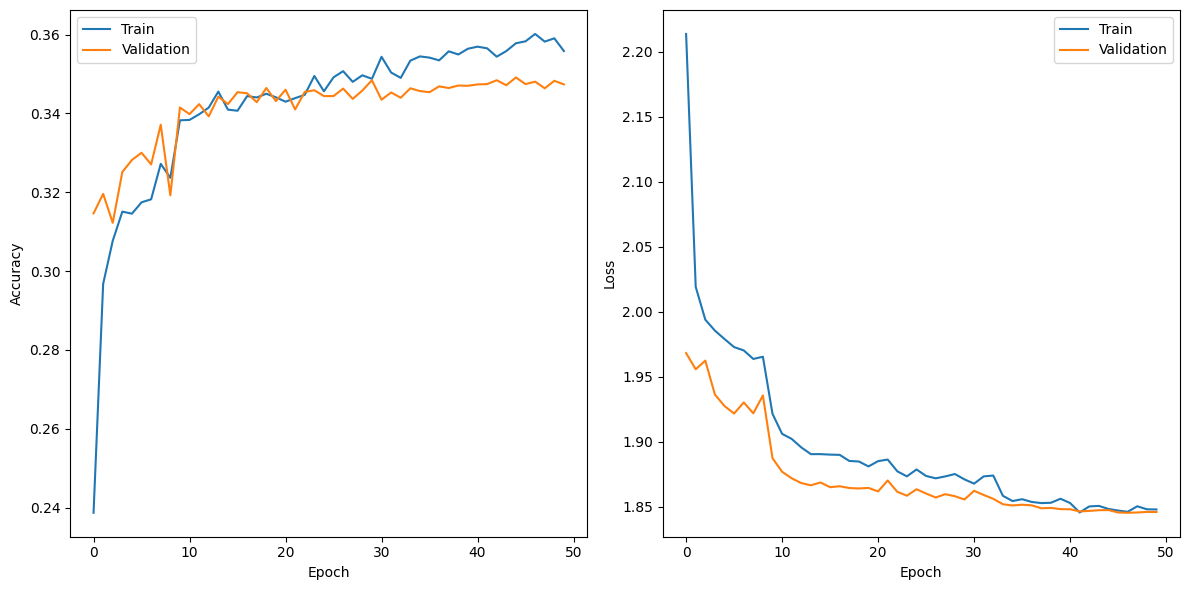

In [57]:
number_of_epochs = 50

for idx, combo in enumerate(random_combinations):
    param_dict = dict(zip(hyperparameters.keys(), combo))
    print("Testing with hyperparameters:", param_dict)

    model_cnn_w2v = best_model_tests(param_dict)

    #eraly stopping and decreasing lr
    early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=3, min_lr=0.000001)

    history = model_cnn_w2v.fit(padded_train, y_train, validation_split=0.33, epochs=number_of_epochs, batch_size=param_dict['batch_size'], verbose=1, callbacks=[early_stopping, reduce_lr], workers = 6)

    print('Result combo {}:'.format(idx), history.history['val_accuracy'][-1])
    # Record the results
    accuracy = max(history.history['val_accuracy'])
    all_results[str(param_dict)] = accuracy
    
    plot_history(history)

In [58]:
model_cnn_w2v.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 30, 100)           3720200   
                                                                 
 dropout_18 (Dropout)        (None, 30, 100)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 28, 64)            19264     
                                                                 
 global_max_pooling1d_6 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                      

In [60]:
#insert the best model
predictions = model_cnn_w2v.predict(padded_test)

from sklearn.metrics import classification_report
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels))

338/338 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.28      0.21      0.24      1080
           1       0.29      0.15      0.20      1080
           2       0.32      0.51      0.39      1080
           3       0.38      0.40      0.39      1080
           4       0.34      0.25      0.28      1080
           5       0.37      0.53      0.44      1080
           6       0.32      0.28      0.30      1080
           7       0.44      0.59      0.50      1080
           8       0.37      0.59      0.46      1080
           9       0.12      0.01      0.02      1080

    accuracy                           0.35     10800
   macro avg       0.32      0.35      0.32     10800
weighted avg       0.32      0.35      0.32     10800



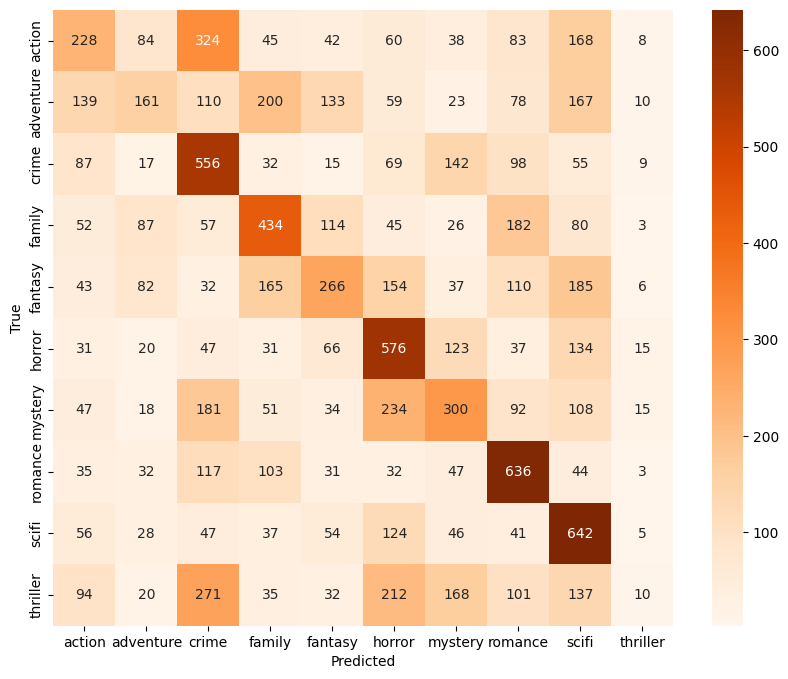

In [61]:

cf = confusion_matrix(y_true=y_test,y_pred=predicted_labels)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cf, annot=True, cmap="Oranges", fmt='g')  # fmt='g' suppresses scientific notation

# Map the numerical values to genres using the dictionary
ax.set_xticklabels([genre_mapping.get(int(label.get_text()), "") for label in ax.get_xticklabels()])
ax.set_yticklabels([genre_mapping.get(int(label.get_text()), "") for label in ax.get_yticklabels()])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [59]:
test_loss_w2v, test_acc_w2v = model_cnn_w2v.evaluate(padded_test, y_test)
print('Test Loss %f, Test Accuracy %f' % (test_loss_w2v, test_acc_w2v))

 14/338 [>.............................] - ETA: 1s - loss: 1.7920 - accuracy: 0.3661 

338/338 [==============================] - 1s 3ms/step - loss: 1.8481 - accuracy: 0.3527
Test Loss 1.848115, Test Accuracy 0.352685
